In [15]:
import pandas as pd
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
importlib.reload(OA)

<module 'OxiAnalysis' from '/home/robbe/ionbot/OxiAnalysis.py'>

# BLTA Ageing Validation attempt
The abundance of the differentially regulated oxPTMs found in the analysis of PXD004713 and PXD010469 will be assessed in this project to see if they increase also with age here

In [45]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Synapse_Aging/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed|gis')), axis = 1, inplace = True)

In [ ]:
quant.head()

In [46]:
cols = [col for col in quant.columns if "Intensity" in col]

In [47]:
quantnorm = OA.quantile_transform(quant, cols)
quantnorm[cols] = quantnorm[cols].transform(lambda x: x/x.sum())

In [48]:
NSI = OA.summedintensities(quantnorm)

/home/robbe/ionbot/OxiAnalysis.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantexox.drop(list(quantexox.filter(regex = 'Detection Type')), axis = 1, inplace = True)


In [49]:
NTSI = NSI.set_index("Modifications").T

In [50]:
NTSI.drop(["Gene Names","Organism","Oxmod?"], inplace=True)

In [51]:
traits = pd.read_csv("/home/robbe/ionbot/Ageing_study/0.Traits.csv")

In [52]:
NTSI.reset_index(inplace=True)

In [53]:
NTSI["index"] = NTSI["index"].apply(lambda x : "_".join(x.split("_")[1:]))

In [54]:
ndata = pd.merge(NTSI, traits, left_on="index", right_on="SampleID").drop('index', axis=1).set_index("SampleID")

In [55]:
ndata2 = ndata.filter(["[1917]Formylasparagine[H]", "[1918]Carbonyl[A]", "[1925]Delta:O(4)[W]", "[345]Trioxidation[C]", "[345]Trioxidation[F]", "[354]Nitro[Y]", "[35]Oxidation[C]", "[35]Oxidation[I]", "[35]Oxidation[P]", "[35]Oxidation[Q]", "[35]oxidation[M]", "[368]Cys->Dha[C]", "Age", "Batch", "Sex"], axis=1).reset_index()

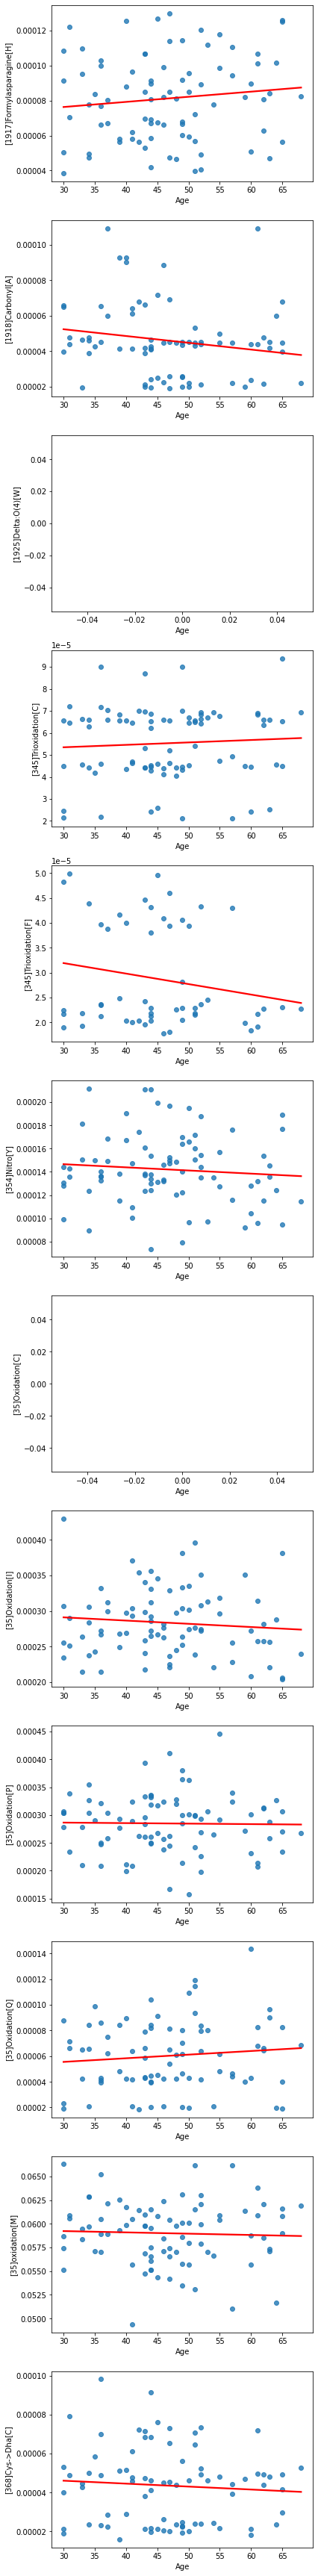

In [82]:
import numpy as np
from scipy import stats
# Define the columns to plot
ndata2 = ndata2.replace(0, np.nan)
columns_to_plot = ndata2.columns[1:13]

# Create the plot
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(6,4*len(columns_to_plot)))

# Plot each line
for i, col in enumerate(columns_to_plot):
    slope, intercept, r_value, p_value, std_err = stats.linregress(ndata2['Age'],ndata2[col])
    sns.regplot(x='Age', y=col, data=ndata2, ax=axes[i], line_kws={'label':'R^2: {}'.format(r_value**2), 'color':'r'}, ci=None)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
    
    handles, labels = axes[i].get_legend_handles_labels()
    if len(handles) > 1:
        axes[i].legend(handles=handles[1:], labels=labels[1:], loc='lower right')


# Add a legend and axis labels
fig.tight_layout(pad=1.0)
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.01), ncol=2)
# Show the plot
plt.savefig("/home/robbe/ionbot/Images/BLSA_validation", dpi=500)
plt.show()
